# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data['datetime']=data['datetime'].astype('datetime64')

In [5]:
data['datetime']=data['datetime'].astype('datetime64')
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day']= data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['minute'] =data['datetime'].dt.minute
data['second']= data['datetime'].dt.second

In [6]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


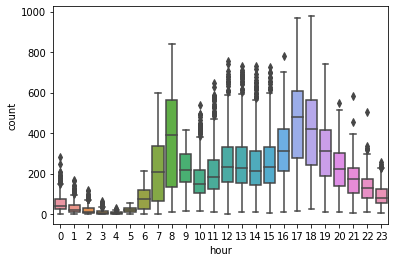

In [7]:
#출퇴근 시간에 이용이 많다.(황인규)
sns.boxplot(x="hour", y="count", data=data)


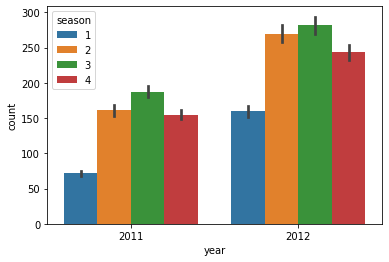

In [8]:
#시간에 따라 점진적으로 이용자가 늘어난다.
#여름, 가을이 상대적으로 이용자가 많다.
#다차원 선형 회귀를 갖는다. (황인규)
sns.barplot(x="year", y="count", hue="season", data=data) 

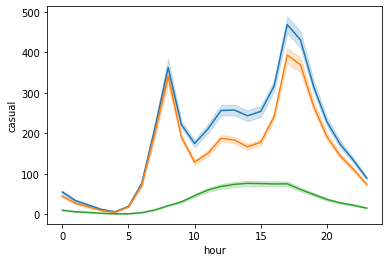

In [9]:
# 시간 대에 따라서, 정회원고객 / 비회원고객 의 사용량이 얼마나 다른지 파악하려 함
#(김상일)
sns.lineplot(x=data['hour'],y=data['count'],data=data)
sns.lineplot(x=data['hour'],y=data['registered'],data=data)
sns.lineplot(x=data['hour'],y=data['casual'],data=data)

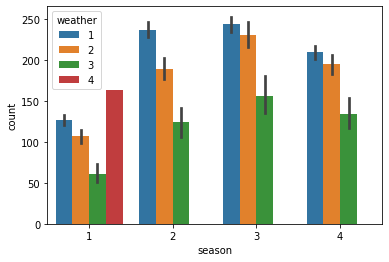

In [12]:
# 어느 계절에, 그리고 어떤 날씨에 사람들이 자전거를 많이 이용할까? (박지은)
# 비바람이 엄청 부는 봄에도 사람들이 자전거를 사용한다는 점을 발견

sns.barplot(x="season", y="count", hue = "weather", data = data)

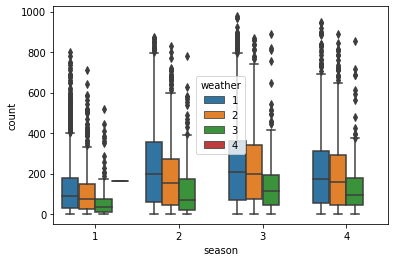

In [13]:
sns.boxplot(x="season", y="count", hue = "weather", data = data)